In [1]:
!pip install wbgapi
!pip install pandas-datareader


                                              0.0/109.5 kB ? eta -:--:--
     ---                                      10.2/109.5 kB ? eta -:--:--
     ---                                      10.2/109.5 kB ? eta -:--:--
     ----------                            30.7/109.5 kB 217.9 kB/s eta 0:00:01
     --------------------                  61.4/109.5 kB 328.2 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 530.6 kB/s eta 0:00:00
                                              0.0/3.9 MB ? eta -:--:--
     ---                                      0.3/3.9 MB 9.2 MB/s eta 0:00:01
     ----------                               1.0/3.9 MB 10.8 MB/s eta 0:00:01
     -------------------------------          3.0/3.9 MB 21.6 MB/s eta 0:00:01
     ---------------------------------------- 3.9/3.9 MB 20.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
import wbgapi as wb
import pandas_datareader.data as web

In [3]:
# data acquistion 
wb.series.info(q='GDP growth')


id,value
NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
,1 elements


In [4]:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'CHN'], 
            labels=True)
gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
CHN,China,NaN,-27.27,-5.58,10.3,18.18,16.95,10.65,-5.77,-4.1,...,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.238638,8.447478,2.990805
USA,United States,NaN,2.30,6.10,4.4,5.80,6.40,6.50,2.50,4.8,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,2.061593


In [6]:
# GDP growth rate 
# Use the series ID retrieved before
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'CHN'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
China,NaN,-27.27,-5.58,10.3,18.18,16.95,10.65,-5.77,-4.1,16.94,...,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.238638,8.447478,2.990805
United States,NaN,2.30,6.10,4.4,5.80,6.40,6.50,2.50,4.8,3.10,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,2.061593


In [7]:
# generates plots for individual contries 
def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    """
    Plots a time series with recessions highlighted. 

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    country : str
        Name of the country to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the line
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    ax.plot(data.loc[country], label=country, **g_params)
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if ylim != None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos,
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos,
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos,
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos,
            'Covid-19\n(2020)', **t_params)

    # Add a baseline for reference
    if baseline != None:
        ax.axhline(y=baseline, 
                   color='black', 
                   linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

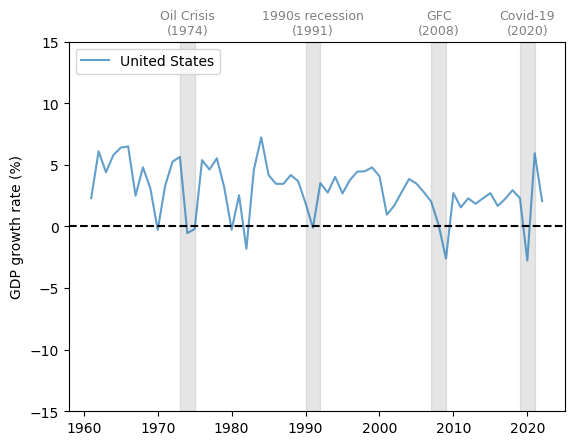

In [8]:
fig, ax = plt.subplots()

country = ''
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()